<a href="https://colab.research.google.com/github/Devsthink/BBVA-DATA-DRIVEN/blob/main/Final__BBVA_Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hackaton BBVA


# Modelo de prediccion de valorizacion de inmuebles

Librerias necesarias para creacion de modelo



*   Manejo de arreglos en diferentes dimensiones
*   Cargar y exportar datos
*   Redes Neuronales
*   Ubicaciones geograficas





# Obtención de datos

*   Carga de datos a variable local



In [744]:
!pip install folium
!pip install -U scikit-learn
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [794]:
import pandas as pd
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
import keras
from time import time

# Arquitectura de la red
from keras import models
from keras import layers
from keras import optimizers
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Carga de los archivos desde un repositorio remoto:

In [795]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [796]:
#path = '/content/drive/MyDrive/BBVA_Hackaton/Train_Data_BBVA.csv'
path = '/content/drive/MyDrive/BBVA_Hackaton/Train_Data_BBVA.csv'

In [797]:
df = pd.read_csv(path)
df.head()

,Fecha entrega del Informe,Tipo de via,Piso,Departamento,Provincia,Distrito,Numero de estacionamiento,Depositos,Latitud,Longitud,...,Posicion,Numero de frentes,Edad,Elevador,Estado de conservacion,Metodo Representado,Moneda principal para calculos,Area Terreno,Area Construccion,Valor comercial
0,2022,2,1,Lima,Lima,Magdalena del Mar,-1,-1,-12.120143,-77.023960,...,Exterior,2,3,1,Bueno,Comparacion de mercado (directo),USD,0.0,81.56,120708.80
1,2022,6,4,Lima,Lima,San Juan de Lurigancho,1,-1,-12.022509,-76.833715,...,Exterior,1,42,2,Regular,Costos o reposicion (directo),USD,410.0,0.00,192225.00
2,2022,2,5,Lima,Lima,Santiago de Surco,1,-1,-12.089686,-77.068454,...,Exterior,1,16,2,Bueno,Comparacion de mercado (directo),USD,0.0,90.13,137886.28
3,2022,10,2,Lima,Lima,Pachacamac,-1,1,-12.095758,-76.981323,...,Exterior,-1,-1,2,Bueno,Costos o reposicion (directo),USD,120.0,0.00,44400.00
4,2022,1,3,Lima,Lima,San Isidro,-1,-1,-12.015309,-76.874213,...,Exterior,0,1,1,Muy bueno,Comparacion de mercado (directo),PEN,0.0,45.00,111600.00


# *Descripción de datos*

*   Distinción de valores numericos y no numericos
*   Rangos entre cada variable




In [798]:
#Valores descriptivos de dataset
df.describe()

,Fecha entrega del Informe,Tipo de via,Piso,Numero de estacionamiento,Depositos,Latitud,Longitud,Numero de frentes,Edad,Elevador,Area Terreno,Area Construccion,Valor comercial
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2022.0,3.100000,2.800000,-0.400000,-0.900000,-11.527040,-77.272841,0.800000,12.950000,1.550000,51.765000,103.330500,186287.549000
std,0.0,3.210181,1.399248,0.940325,0.447214,1.735406,0.918707,1.105013,19.489471,0.604805,106.581273,75.481729,128599.103879
min,2022.0,1.000000,1.000000,-1.000000,-1.000000,-12.136353,-80.654541,-1.000000,-1.000000,0.000000,0.000000,0.000000,44400.000000
25%,2022.0,1.000000,2.000000,-1.000000,-1.000000,-12.100001,-77.030632,0.750000,0.750000,1.000000,0.000000,63.080000,110230.000000
50%,2022.0,2.000000,2.500000,-1.000000,-1.000000,-12.070663,-77.006111,1.000000,1.500000,2.000000,0.000000,89.125000,137648.140000
75%,2022.0,3.000000,4.000000,1.000000,-1.000000,-12.027933,-76.962508,1.000000,18.750000,2.000000,30.000000,142.395000,255300.412500
max,2022.0,10.000000,5.000000,1.000000,1.000000,-5.185692,-76.833715,3.000000,56.000000,2.000000,410.000000,333.580000,604139.200000


In [799]:
#Numero de registros y valores a tomar en cuenta
df.shape

(20, 21)

In [800]:
df.dtypes

Fecha entrega del Informe           int64
Tipo de via                         int64
Piso                                int64
Departamento                       object
Provincia                          object
Distrito                           object
Numero de estacionamiento           int64
Depositos                           int64
Latitud                           float64
Longitud                          float64
Categoria del bien                 object
Posicion                           object
Numero de frentes                   int64
Edad                                int64
Elevador                            int64
Estado de conservacion             object
Metodo Representado                object
Moneda principal para calculos     object
Area Terreno                      float64
Area Construccion                 float64
Valor comercial                   float64
dtype: object

## Conteo de valores 
Numero de itereaciones por cada valor distinto en variables

In [801]:
df['Tipo de via'].value_counts()

1     9
2     4
10    3
3     3
6     1
Name: Tipo de via, dtype: int64

In [802]:
df['Piso'].value_counts()

2    6
1    4
4    4
5    3
3    3
Name: Piso, dtype: int64

In [803]:
df['Departamento'].value_counts()

Lima           18
La Libertad     1
Piura           1
Name: Departamento, dtype: int64

In [804]:
df['Estado de conservacion'].value_counts()

Bueno        12
Muy bueno     6
Regular       1
Malo          1
Name: Estado de conservacion, dtype: int64

In [805]:
df['Provincia'].value_counts()

Lima        18
Trujillo     1
Piura        1
Name: Provincia, dtype: int64

In [806]:
df['Categoria del bien'].value_counts()

Departamento            13
Vivienda Unifamiliar     4
Local Comercial          2
Terreno Urbano           1
Name: Categoria del bien, dtype: int64

In [807]:
df['Metodo Representado'].value_counts()

Comparacion de mercado (directo)    15
Costos o reposicion (directo)        5
Name: Metodo Representado, dtype: int64

In [808]:
df['Latitud'].value_counts()

-12.120143    1
-12.022509    1
-12.062116    1
-12.064683    1
-12.038434    1
-12.112711    1
-12.090449    1
-8.111449     1
-12.052870    1
-12.136353    1
-12.119652    1
-5.185692     1
-12.076643    1
-11.899533    1
-12.029741    1
-12.095764    1
-12.015309    1
-12.095758    1
-12.089686    1
-12.121306    1
Name: Latitud, dtype: int64

In [809]:
df['Longitud'].value_counts()

-77.023960    1
-76.833715    1
-76.949711    1
-77.013660    1
-76.957028    1
-76.964334    1
-77.018342    1
-79.026046    1
-77.006517    1
-77.002325    1
-77.005706    1
-80.654541    1
-77.050648    1
-77.057616    1
-76.945582    1
-77.023360    1
-76.874213    1
-76.981323    1
-77.068454    1
-76.999737    1
Name: Longitud, dtype: int64

#Direcciones especificas

Se pretende utilizar la localización para agregar peso y valor a la funcion de calculo

In [810]:
directions = []
geolocalizador = Nominatim(user_agent="GetLoc");
#Se recorren todos los valores para obtener su direccion
for i in range(len(df)):
    direction = geolocalizador.reverse(str(df.at[i,"Latitud"]) + ',' + str(df.at[i,"Longitud"]))



    directions.append(direction) #Se agrega a la lista

    

In [811]:
#Se muestra la lista de direcciones
arr_directions = np.array(directions)
print(arr_directions)

[['Alimentos Orgánicos, Avenida Ricardo Palma, Miraflores, Lima, Lima Metropolitana, Lima, 15047, Perú'
  (-12.1200224, -77.02411169999999)]
 ['Cruz de Mayo, Huaycán, Ate, Lima, Lima Metropolitana, Lima, 15483, Perú'
  (-12.022988868528829, -76.83358761224656)]
 ['Institución Educativa Miguel Grau, 1025, Jirón Libertad, Magdalena, Magdalena del Mar, Lima, Lima Metropolitana, Lima, 15086, Perú'
  (-12.089316, -77.06880828321442)]
 ['Jirón 27, San Borja, Lima, Lima Metropolitana, Lima, 15023, Perú'
  (-12.095700479837816, -76.98133061268804)]
 ['San Juan, Santa Clara, Ate, Lima, Lima Metropolitana, Lima, 15487, Perú'
  (-12.015178275510912, -76.87424669152152)]
 ['File Security, 227, Calle German Schreiber, Centro financiero de San Isidro, San Isidro, Lima, Lima Metropolitana, Lima, 15000, Perú'
  (-12.0958146, -77.0233109)]
 ['Santa Anita, Lima, Lima Metropolitana, Lima, 15009, Perú'
  (-12.029485310302201, -76.94566781602553)]
 ['Comas, Lima, Lima Metropolitana, Lima, 15316, Perú'
  (-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


#Rango de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28d741bfd0>,
      dtype=object)

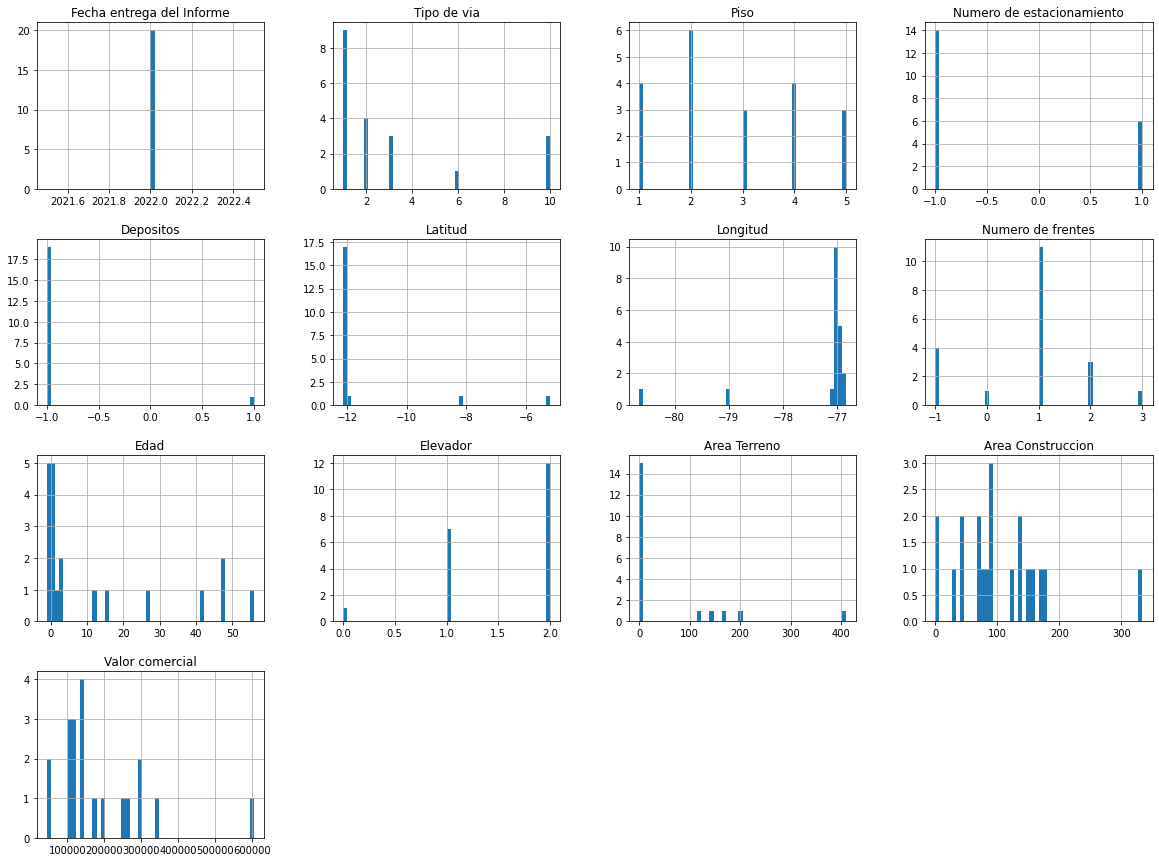

In [812]:
df.hist(bins=50, figsize=(20,15))

# Mapeo de las propiedades (no cul, sin mapa, no jala chido)

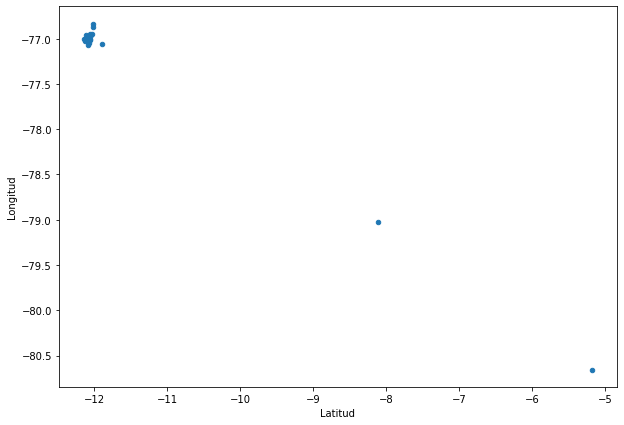

In [813]:
#grafica de dispersion en X, Y
df.plot(kind="scatter", x="Latitud", y="Longitud", figsize=(10,7))

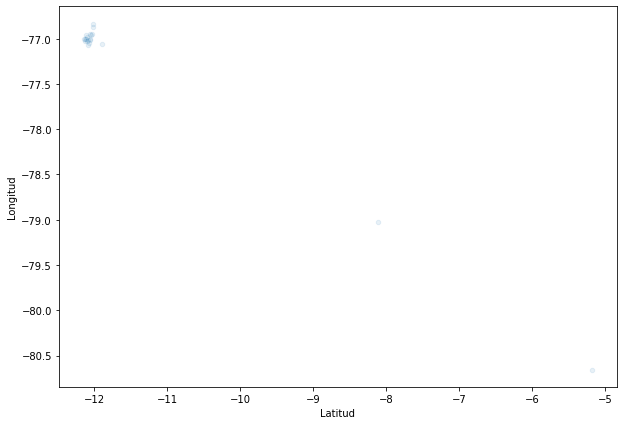

In [814]:
#grafica de dispersion en X, Y con alfa para ver donde hay mayor densidad
df.plot(kind="scatter", x="Latitud", alpha=0.1, y="Longitud", figsize=(10,7))

In [815]:
#cambiamos el tamaño del punto y agregamos una escala de medicion
#s tamaño de cada punto
#c etiqueta


#df.plot(kind="scatter", x="Latitud", alpha=0.1, y="Longitud", figsize=(10,7),
 #       s=df['Valor comercial'], c='median_house_value')

# Mapeo con follium

In [816]:
import folium
#x="Latitud (Decimal)", y="Longitud (Decimal)"
mapa=folium.Map(location=[-12.057158, -77.048902], zoom_start=6 )
mapa

In [817]:
distritos= df[ ['Latitud','Longitud']].to_numpy()
distritos

array([[-12.1201435, -77.0239598],
       [-12.0225094, -76.833715 ],
       [-12.0896856, -77.0684536],
       [-12.0957584, -76.9813229],
       [-12.0153092, -76.874213 ],
       [-12.0957639, -77.02336  ],
       [-12.0297405, -76.9455815],
       [-11.899533 , -77.0576157],
       [-12.0766427, -77.0506477],
       [ -5.1856924, -80.6545414],
       [-12.1196524, -77.0057059],
       [-12.1363533, -77.0023247],
       [-12.05287  , -77.006517 ],
       [ -8.1114492, -79.0260459],
       [-12.090449 , -77.018342 ],
       [-12.112711 , -76.9643341],
       [-12.0384343, -76.9570281],
       [-12.064683 , -77.01366  ],
       [-12.0621164, -76.9497108],
       [-12.1213057, -76.9997372]])

In [818]:
from folium import plugins
from folium.plugins import HeatMap

HeatMap (distritos,radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)
mapa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  after removing the cwd from sys.path.


# Correlacion de variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28d655e490>,
      dtype=object)

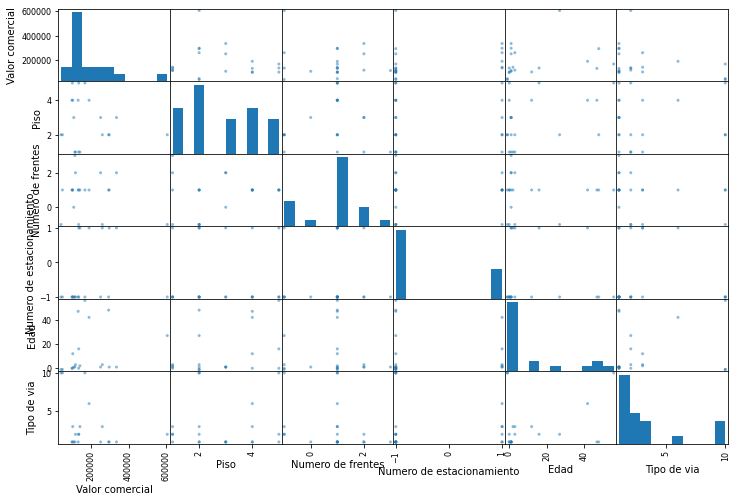

In [819]:
#diagramas de coorelacion, se me ocurre que sea de todas las variables contra todas
from pandas.plotting import scatter_matrix
atributos=["Valor comercial","Piso","Provincia","Numero de frentes","Numero de estacionamiento","Edad","Tipo de via","Categoria del bien","Estado de conservacion"]

scatter_matrix(df[atributos], figsize=(12,8))

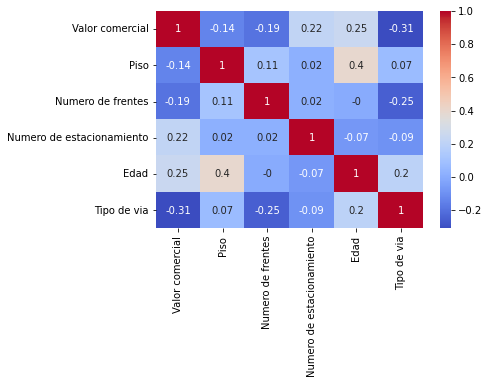

In [820]:
import seaborn as sn

corrMatrix=df[atributos].corr().round(2)
sn.heatmap(corrMatrix, annot=True,cmap='coolwarm')
plt.show()

# Preparar los datos y sus transformaciones

In [821]:
#revisar y eliminar los datos nulos
df.isnull().values.any()

False

In [822]:
#numero de datos
len(df)

20

# Categorizar(lo haremos nominal)

In [826]:
df['Provincia'].value_counts()

Lima        18
Trujillo     1
Piura        1
Name: Provincia, dtype: int64

In [827]:
from sklearn.preprocessing import OneHotEncoder
Nominal_codificador=OneHotEncoder(sparse=False)
Nominal_codificador.fit_transform(df[['Provincia']])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [828]:
#nominal
Nominal_codificador.categories_

[array(['Lima', 'Piura', 'Trujillo'], dtype=object)]

# PIPELINE

In [849]:
from sklearn.utils.fixes import sklearn
#MODULOS IMPORTANTES
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

#lista de variables numericas y categoricas
numeric_list=['Fecha entrega del Informe', "Tipo de via", "Piso", "Numero de estacionamiento", "Depositos", "Latitud", "Longitud","Numero de frentes", "Edad", "Elevador", "Area Terreno", "Area Construccion","Valor comercial" ]
categorical_list=['Moneda principal para calculos',"Departamento","Provincia", "Distrito","Categoria del bien", "Posicion", "Estado de conservacion", "Metodo Representado" ]

In [850]:
from pandas.core.arrays import categorical
#pipeline de procesamiento para los datos numericos y categoricos
numeric_transformer= Pipeline(steps=[("scaler", StandardScaler())]) #Reescalar los numeros
categorical_transformer=Pipeline(steps=[("onehot", OneHotEncoder())]) #Casterar a numeros



ColumnTransformer function

In [851]:
from matplotlib.transforms import Transform
#definir transformaciones
transformer= ColumnTransformer ([
    ("num", numeric_transformer,numeric_list) , ("cat", categorical_transformer, categorical_list)
]);

# Preparacion de los datos 2.0

In [852]:
X_ejemplo = df.drop(columns=numeric_list, axis=1)
X_ejemplo

,Departamento,Provincia,Distrito,Categoria del bien,Posicion,Estado de conservacion,Metodo Representado,Moneda principal para calculos
0,Lima,Lima,Magdalena del Mar,Departamento,Exterior,Bueno,Comparacion de mercado (directo),USD
1,Lima,Lima,San Juan de Lurigancho,Local Comercial,Exterior,Regular,Costos o reposicion (directo),USD
2,Lima,Lima,Santiago de Surco,Departamento,Exterior,Bueno,Comparacion de mercado (directo),USD
3,Lima,Lima,Pachacamac,Vivienda Unifamiliar,Exterior,Bueno,Costos o reposicion (directo),USD
4,Lima,Lima,San Isidro,Departamento,Exterior,Muy bueno,Comparacion de mercado (directo),PEN
5,Lima,Lima,La Victoria,Local Comercial,Exterior,Bueno,Comparacion de mercado (directo),USD
6,Lima,Lima,Santiago de Surco,Departamento,Exterior,Bueno,Comparacion de mercado (directo),PEN
7,Lima,Lima,Santiago de Surco,Departamento,Interior,Muy bueno,Comparacion de mercado (directo),USD
8,Lima,Lima,La Victoria,Departamento,Exterior,Malo,Comparacion de mercado (directo),USD
9,Lima,Lima,Ate,Departamento,Exterior,Bueno,Comparacion de mercado (directo),USD


In [853]:
#crear x (quitar la columna o el campo valor comercial
# X_raw_nnn -> raw no numeric data
X_raw_nnd = df.drop(columns=numeric_list, axis=1)

#Convert data to numeric data 
enc = OrdinalEncoder()
enc.fit(X_raw_nnd)

# X_nnn -> no numeric data decode to numeric
X_nnd_decode =  np.array(enc.transform(X_raw_nnd))

In [854]:
X_nnd_decode

array([[ 1.,  0.,  4.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  8.,  1.,  0.,  3.,  1.,  1.],
       [ 1.,  0.,  9.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  5.,  3.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  7.,  0.,  0.,  2.,  0.,  0.],
       [ 1.,  0.,  3.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  9.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  9.,  0.,  1.,  2.,  0.,  1.],
       [ 1.,  0.,  3.,  0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  2.,  0.,  1.],
       [ 1.,  0.,  7.,  0.,  1.,  2.,  0.,  1.],
       [ 0.,  2.,  2.,  2.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  7.,  3.,  0.,  2.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  6.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  9.,  0.,  0.,  2.,  0.,  1.],
       [ 2.,  1., 10.,  3.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  9.,  3.,  1.,  0.,  1.,  0.]])

In [855]:
#X need to contain numeric and categorical data
X_nd = np.array(df.drop(columns=categorical_list, axis=1))
X_nd

array([[ 2.02200000e+03,  2.00000000e+00,  1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.21201435e+01,
        -7.70239598e+01,  2.00000000e+00,  3.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  8.15600000e+01,
         1.20708800e+05],
       [ 2.02200000e+03,  6.00000000e+00,  4.00000000e+00,
         1.00000000e+00, -1.00000000e+00, -1.20225094e+01,
        -7.68337150e+01,  1.00000000e+00,  4.20000000e+01,
         2.00000000e+00,  4.10000000e+02,  0.00000000e+00,
         1.92225000e+05],
       [ 2.02200000e+03,  2.00000000e+00,  5.00000000e+00,
         1.00000000e+00, -1.00000000e+00, -1.20896856e+01,
        -7.70684536e+01,  1.00000000e+00,  1.60000000e+01,
         2.00000000e+00,  0.00000000e+00,  9.01300000e+01,
         1.37886280e+05],
       [ 2.02200000e+03,  1.00000000e+01,  2.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.20957584e+01,
        -7.69813229e+01, -1.00000000e+00, -1.00000000e+00,
         2.00000000e+00,  1.20000000e

In [856]:
#Union de X no numericas y X numericas 
X = np.concatenate((X_nnd_decode, X_nd), axis=1)
X

array([[ 1.00000000e+00,  0.00000000e+00,  4.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  2.02200000e+03,
         2.00000000e+00,  1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.21201435e+01, -7.70239598e+01,
         2.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  8.15600000e+01,  1.20708800e+05],
       [ 1.00000000e+00,  0.00000000e+00,  8.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  2.02200000e+03,
         6.00000000e+00,  4.00000000e+00,  1.00000000e+00,
        -1.00000000e+00, -1.20225094e+01, -7.68337150e+01,
         1.00000000e+00,  4.20000000e+01,  2.00000000e+00,
         4.10000000e+02,  0.00000000e+00,  1.92225000e+05],
       [ 1.00000000e+00,  0.00000000e+00,  9.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  2.02200000e

In [857]:
#crear y (valor de la columna valor comercial)
y =  np.array(df["Valor comercial"])
y

array([120708.8 , 192225.  , 137886.28,  44400.  , 111600.  , 604139.2 ,
       262095.12, 298389.  , 144249.8 , 102267.12, 104563.2 , 137410.  ,
       117580.5 ,  52000.  , 336684.19, 134848.86, 106120.  , 253035.51,
       170336.25, 295212.15])

In [858]:
#Forma 1
from sklearn.model_selection import train_test_split
#X_main, X_test, y_main, y_test = train_test_split(X,y,test_size=0.8) # Puedes usar desde esta linea
#X_train, X_val, y_train, y_val = train_test_split(X_main,y_main, train_size=0.2) # 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9) 

In [859]:
#revisa el tamaño de cada muesta
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 21), (2, 21), (18,), (2,))

# Red Neuronal

In [860]:
data_shape = df.shape[1:]
data_shape[0]

21

In [861]:
# Inicialización de red neuronal
network = models.Sequential()  
#network.add(layers.Dense(units=data_shape[0], activation='sigmoid', input_dim=data_shape[0], name='hidden-layer_1'))
#network.add(layers.Dense(units=data_shape[0], activation='sigmoid', input_dim=data_shape[0], name='hidden-layer_2'))
#network.add(layers.Dense(units=data_shape[0], activation='sigmoid', input_dim=data_shape[0], name='hidden-layer_3'))
#network.add(layers.Dense(units=1, activation='sigmoid', name='output'))
network.add(layers.InputLayer(data_shape))
network.add(layers.Dense(256,'relu'))
network.add(layers.Dense(128,'relu'))
network.add(layers.Dense(64,'relu'))
network.add(layers.Dense(32,'relu'))
network.add(layers.Dense(16,'relu'))
network.add(layers.Dense(1,'linear'))


In [862]:
# optimizador
opt = tf.keras.optimizers.Adam(learning_rate=.1) 
# compilador
network.compile(optimizer=opt, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
# Muestra arquitectura de la red
network.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 256)               5632      
                                                                 
 dense_117 (Dense)           (None, 128)               32896     
                                                                 
 dense_118 (Dense)           (None, 64)                8256      
                                                                 
 dense_119 (Dense)           (None, 32)                2080      
                                                                 
 dense_120 (Dense)           (None, 16)                528       
                                                                 
 dense_121 (Dense)           (None, 1)                 17        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-tra

In [863]:
y_train.shape

(18,)

In [864]:
X_train.shape

(18, 21)

# Fase de entrenamiento

In [865]:
# Entrenamiento de la red
#tic = time()
network.fit(x=X_train, y=y_train,validation_data=(X,y), epochs=100)
#print('total training time:', time()-tic, 'seconds')

Epoch 1/100
1/1 [==============================] - 1s 862ms/step - loss: 49588805632.0000 - root_mean_squared_error: 222685.4375 - val_loss: 31530049077248.0000 - val_root_mean_squared_error: 5615162.5000
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 30652311273472.0000 - root_mean_squared_error: 5536453.0000 - val_loss: 37140901888.0000 - val_root_mean_squared_error: 192719.7500
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 36111695872.0000 - root_mean_squared_error: 190030.7812 - val_loss: 24079849472.0000 - val_root_mean_squared_error: 155176.8281
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 23410931712.0000 - root_mean_squared_error: 153006.3125 - val_loss: 1317590400.0000 - val_root_mean_squared_error: 36298.6289
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 1277454848.0000 - root_mean_squared_error: 35741.5000 - val_loss: 3828615936.0000 - val_root_mean_squared_error: 61875.81

In [866]:
# Precisiónx
results = network.evaluate(X_test, y_test)
print('results loss:', results[0])
print('results accuracy:', results[1])

1/1 [==============================] - 0s 24ms/step - loss: 7360326144.0000 - root_mean_squared_error: 85792.3438
results loss: 7360326144.0
results accuracy: 85792.34375


In [867]:
# Salida de la red entrenada
y_output = network.predict(X_test)
print("Salida de la red neuronal: ")
print(y_output.round().transpose())

1/1 [==============================] - 0s 77ms/step
Salida de la red neuronal: 
[[177908. 177908.]]


In [868]:
mean_squared_error(network.predict(X_test),y_test,squared=False)

1/1 [==============================] - 0s 19ms/step


85792.34249756207

# Fase de pruebas


In [876]:
path = '/content/drive/MyDrive/BBVA_Hackaton/Test2_Data_BBVA.csv'
df_test = pd.read_csv(path)
df_test.head()

,Fecha entrega del Informe,Tipo de via,Piso,Departamento,Provincia,Distrito,Numero de estacionamiento,Depositos,Latitud,Longitud,Categoria del bien,Posicion,Numero de frentes,Edad,Elevador,Estado de conservacion,Metodo Representado,Area Terreno,Area Construccion,Valor comercial
0,2021,1,-1,Lima,Lima,Surquillo,0,1,-12.105644,-77.025705,Departamento,No definido,-1,1,-1,Bueno,Comparacion de mercado (directo),11.00,64.92,0
1,2017,2,-1,Lima,Lima,Santiago de Surco,1,1,-12.138068,-76.985660,Departamento,No definido,-1,1,-1,Muy bueno,Comparacion de mercado (directo),50.32,134.20,0
2,2019,3,-1,Apurmac,Chincheros,Chincheros,1,1,0.000000,-77.090878,Oficina,No definido,-1,1,-1,Bueno,Comparacion de mercado (directo),44778.00,111.11,0
3,2019,2,-1,Ucayali,Coronel Portillo,Calleria,-1,-1,-8.381362,-74.537930,Terreno Urbano,No definido,-1,-1,-1,No definido,Costos o reposicion (directo),31.00,0.00,0
4,2020,1,-1,Lima,Lima,Magdalena del Mar,1,2,-12.091392,-77.055850,No definido,No definido,-1,2,-1,En proyecto,Comparacion de mercado (directo),3.22,111.11,0


In [870]:
# X_raw_nnn -> raw no numeric data
X_raw_nnd_test= df_test.drop(columns=numeric_list, axis=1)

#Convert data to numeric data 
enc = OrdinalEncoder()
enc.fit(X_raw_nnd_test)

# X_nnn -> no numeric data decode to numeric
X_nnd_decode_test =  np.array(enc.transform(X_raw_nnd_test))

In [871]:
X_nnd_decode_test.shape

(10, 8)

In [872]:
#X need to contain numeric and categorical data
X_nd_test = np.array(df_test.drop(columns=categorical_list, axis=1))
X_nd_test.shape

(10, 13)

In [873]:
#Union de X no numericas y X numericas 
X_real_test= np.concatenate((X_nnd_decode_test, X_nd_test), axis=1)
X_real_test

array([[ 4.0000000e+00,  5.0000000e+00,  8.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0210000e+03,  1.0000000e+00, -1.0000000e+00,  0.0000000e+00,
         1.0000000e+00, -1.2105644e+01, -7.7025705e+01, -1.0000000e+00,
         1.0000000e+00, -1.0000000e+00,  1.1000000e+01,  6.4920000e+01,
         0.0000000e+00],
       [ 4.0000000e+00,  5.0000000e+00,  7.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  3.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0170000e+03,  2.0000000e+00, -1.0000000e+00,  1.0000000e+00,
         1.0000000e+00, -1.2138068e+01, -7.6985660e+01, -1.0000000e+00,
         1.0000000e+00, -1.0000000e+00,  5.0320000e+01,  1.3420000e+02,
         0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  1.0000000e+00,  3.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0190000e+03,  3.0000000e+00, -1.0000000e+00,  1.0000000e+00,
         1.000

In [874]:
# Salida de la red entrenada
y_output_test = network.predict(X_real_test)
print("Salida de la red neuronal: ")
print(y_output_test)

1/1 [==============================] - 0s 19ms/step
Salida de la red neuronal: 
[[ 1417720.8]
 [ 1397341. ]
 [34780256. ]
 [ 1408684.6]
 [ 1415020.8]
 [ 1394961.5]
 [ 1418539.2]
 [ 1411677. ]
 [ 1413639.5]
 [ 1725560.1]]
